In [1]:
#importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
#loading the data and taking a look

In [4]:
data_set = pd.read_csv('Mall_Customers.csv')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#observing the data

In [6]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#replacing spaces in column names with underscores for better usability

In [8]:
data_set.columns = data_set.columns.str.replace(' ','_')
data_set = data_set.rename(columns = {'Annual_Income_(k$)':'Annual_Income','Spending_Score_(1-100)':'Spending_Score'})
data_set.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#visualise the data to check if the distribution is normal

<Figure size 640x480 with 0 Axes>

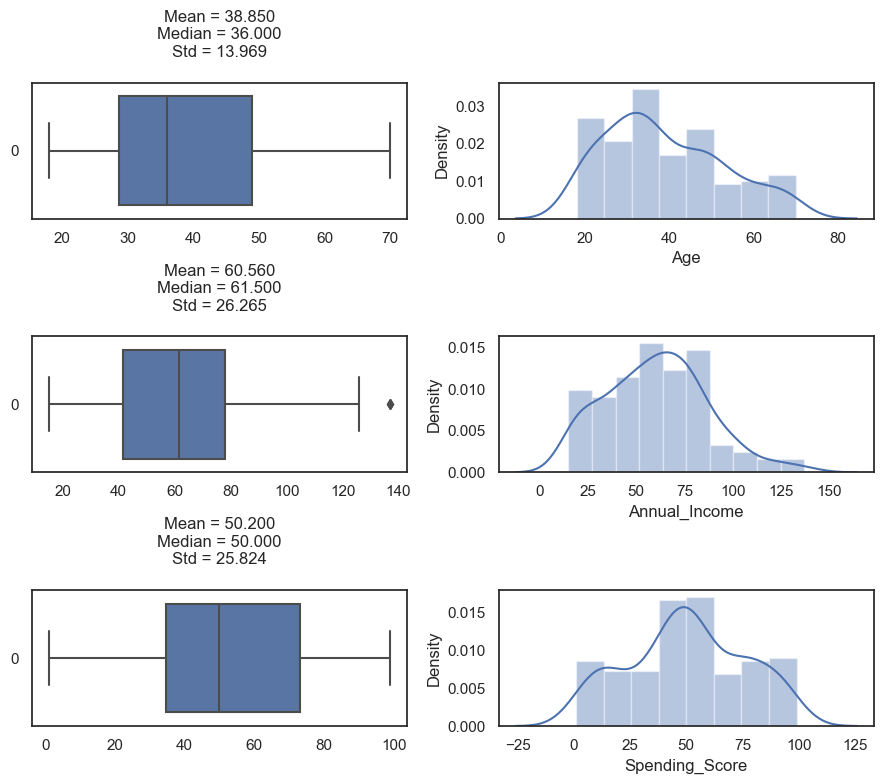

In [10]:
sns.set(style='white')
plt.clf()
warnings.filterwarnings('ignore')
def plot(cols):
    fig, axs = plt.subplots(3,2,figsize=(9,8))
    for i, col in enumerate(cols):
        sns.boxplot(data_set[col], ax = axs[i][0], orient = 'h')
        sns.distplot(data_set[col], ax = axs[i][1])
        axs[i][0].set_title('Mean = %.3f\nMedian = %.3f\nStd = %.3f\n'%(data_set[col].mean(),data_set[col].median(),data_set[col].std()))
    #plt.setp(axs)
    plt.tight_layout()
    plt.show()
    
numerical_columns = ['Age','Annual_Income','Spending_Score']
plot(numerical_columns)


In [11]:
#noting distribution of categorical data

<AxesSubplot: xlabel='Gender', ylabel='count'>

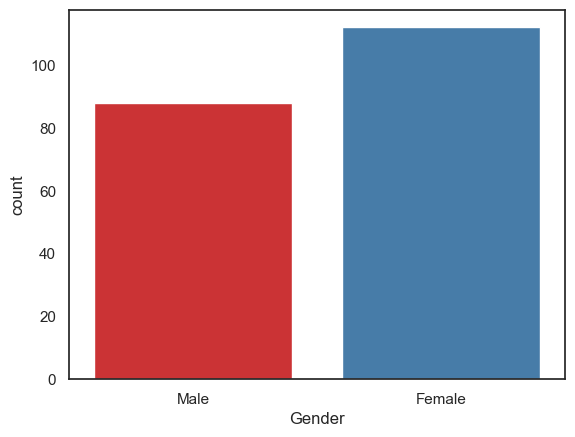

In [12]:
sns.countplot(x='Gender', data=data_set, palette="Set1")     

In [13]:
#relations with other features

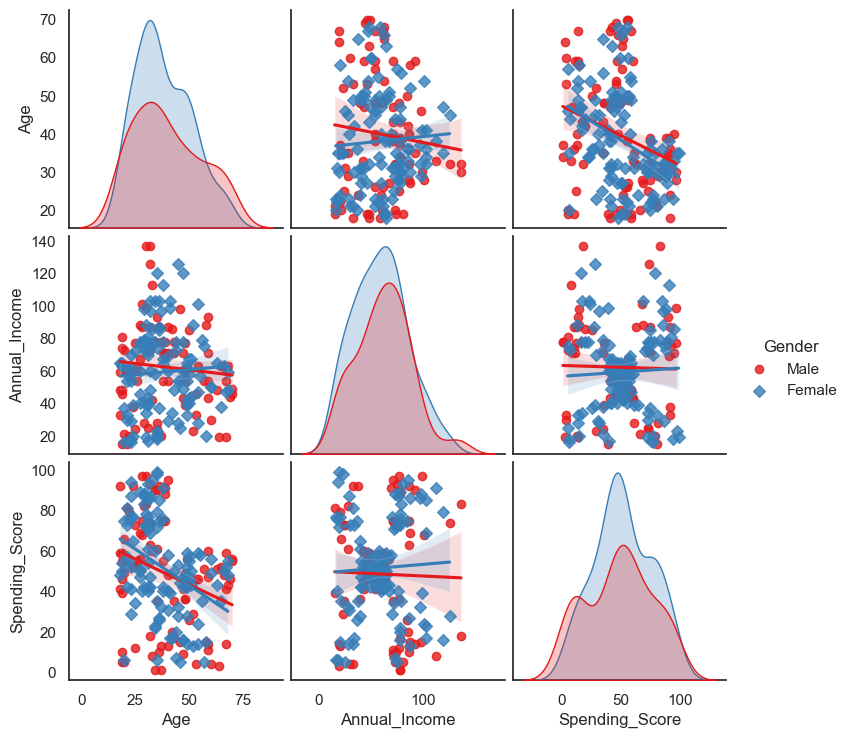

In [14]:
sns.pairplot(data_set, vars=["Age", "Annual_Income", "Spending_Score"],  kind ="reg", hue = "Gender", palette="Set1", markers = ['o','D'])   

In [15]:
#checking correlation between attributes

<AxesSubplot: >

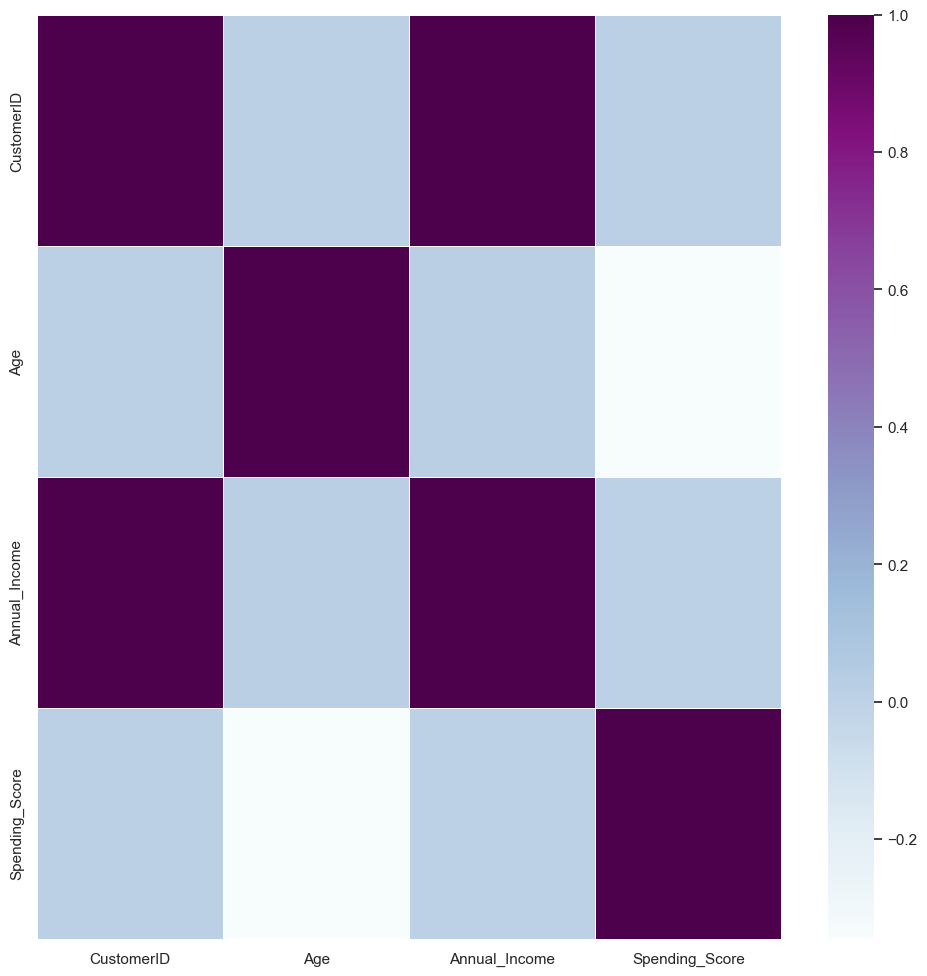

In [16]:
correlation = data_set.corr(method='spearman')
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cmap="BuPu", linewidths=.4)

In [17]:
#since we are concerned with spending score, and customerID is not correlated with it
#we drop that column

In [18]:
data_set.drop(columns='CustomerID',axis=1,inplace=True)

In [19]:
#encoding categorical data

In [20]:
data_set = pd.get_dummies(data_set).reset_index(drop=True)
data_set.head()

,Age,Annual_Income,Spending_Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [21]:
#scaling the data before clustering

In [22]:
scaled_data_set = StandardScaler().fit_transform(data_set)
scaled_data_set

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [23]:
#finding desired number of clusters using elbow method

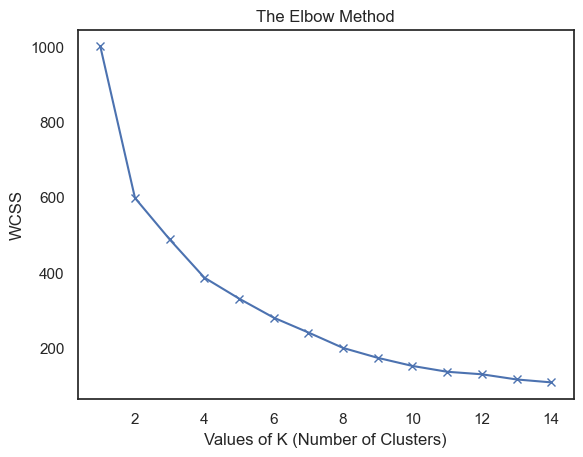

In [24]:
WCSS = []
range_val = range(1,15)
for i in range_val:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(pd.DataFrame(scaled_data_set))
  WCSS.append(kmeans.inertia_)
plt.plot(range_val,WCSS,'bx-')
plt.xlabel('Values of K (Number of Clusters)') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method') 
plt.show()

In [25]:
#applying kmeans clustering with k = 5

In [26]:
kmeans_model=KMeans(5)
kmeans_clusters = kmeans_model.fit_predict(data_set)

In [27]:
#visualising the clusters

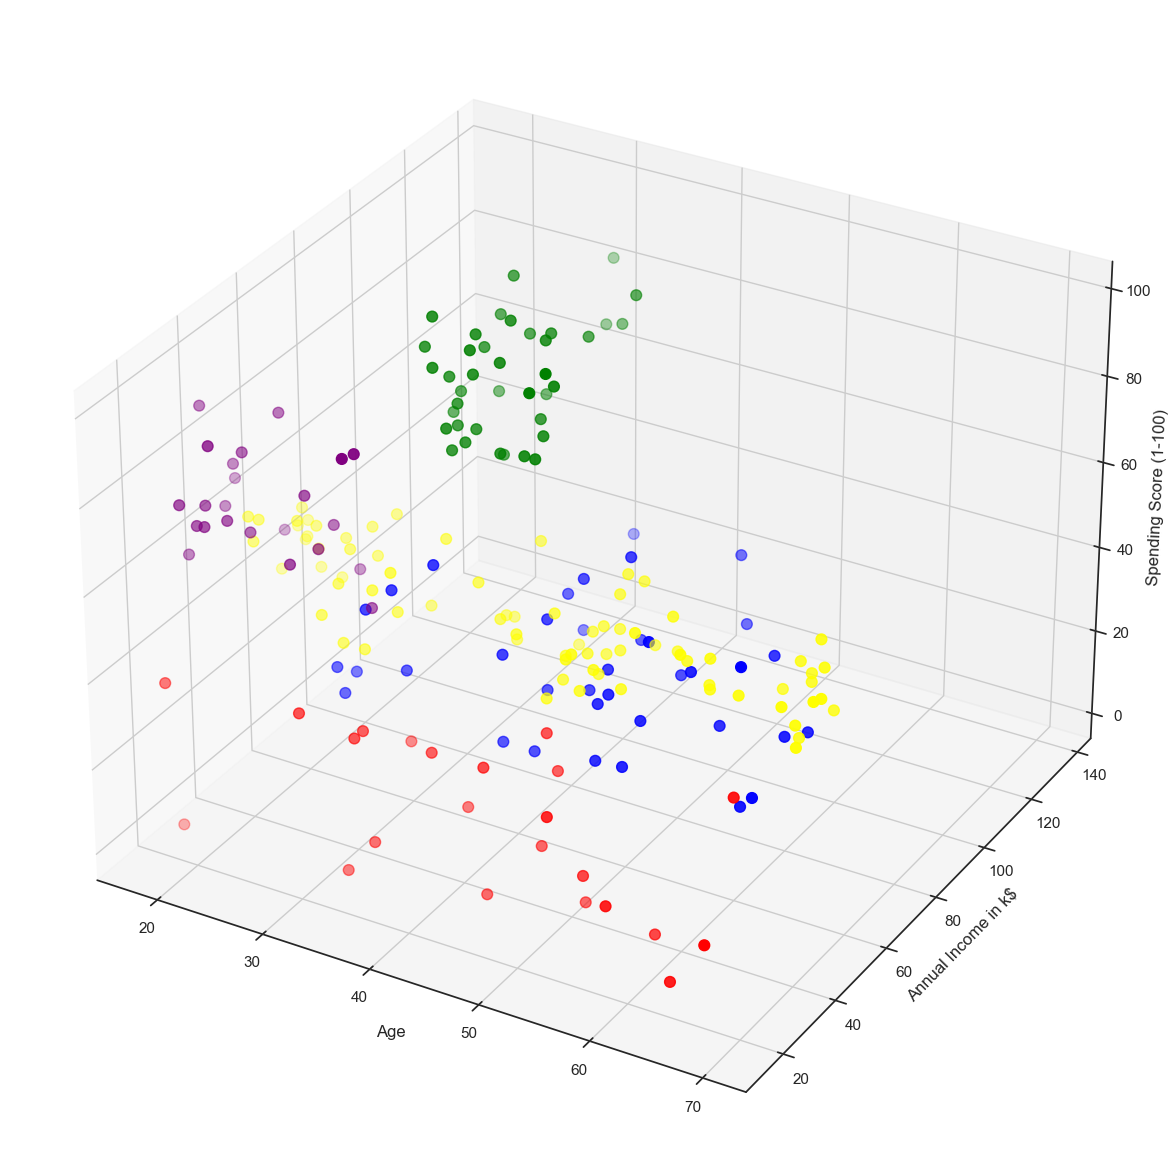

In [28]:
data_set["label"] = kmeans_clusters
fig = plt.figure(figsize=(25,15))
axs = fig.add_subplot(111, projection='3d')
cluster_colors = ['red','green','blue','yellow','purple']
for i in range(5):
    axs.scatter(data_set.Age[data_set.label == i], data_set["Annual_Income"][data_set.label == i], data_set["Spending_Score"][data_set.label == i], c=cluster_colors[i], s=60)
plt.xlabel("Age")
plt.ylabel("Annual Income in k$")
axs.set_zlabel('Spending Score (1-100)')
plt.show()